# Fit the data
- We take into account the component $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$
    - Background $B^0 \to D^{*-} D_s^+$ with simultaneous fit on $m(D_s\to 3\pi)$
    - Background of misidentified pions: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - Background of partially reconstructed decays $B^0 \to D^{*-} \pi^+ \pi^+ \pi^- h$
    - Combinatorial background (exponential)

## Import

In [1]:
import zfit
import json
import numpy as np

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


## Load

In [2]:
with open(f'{loc.JSON}/MC_params.json', 'r') as f:
    MC_param_results = json.load(f)

In [3]:
print(MC_param_results)

{'alphaL_MC': 1.3258599677648724, 'alphaR_MC': 4.276881429632823, 'mu_MC': 5281.17718503673, 'nL_MC': 1.646374921465709, 'nR_MC': 9.910295284850122, 'sigma_MC': 14.832681103461727}


In [4]:
df_data_strip = fct.load_data(years, magnets, type_data='data_strip', vars=['B0_M','tau_M'],
                            cut_DeltaM=True)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2016_down.root
cut on Delta_M


In [5]:
name_data = 'all_data_strip_cutDeltaM'

## Distributions

### Init

In [6]:
# mass of Ds: 1,968 MeV
size_tau_M = 80.
low_tau_M = 1970. - size_tau_M
high_tau_M = 1970. + size_tau_M

In [7]:
n_events_B0_M = {}
d_initial_values = {}
n_Ds = {}
low = 5050.
high = 5550.

### Distribution $m(D_s\to3\pi)$

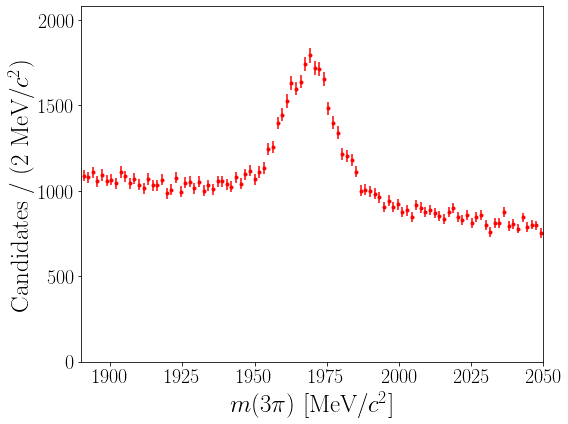

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_all_data_strip_cutDeltaM.pdf


In [10]:
fct.plot_hist_particle({name_data:df_data_strip},'tau_M',
              low = low_tau_M, high = high_tau_M,
              n_bins = 100, mode_hist = False)

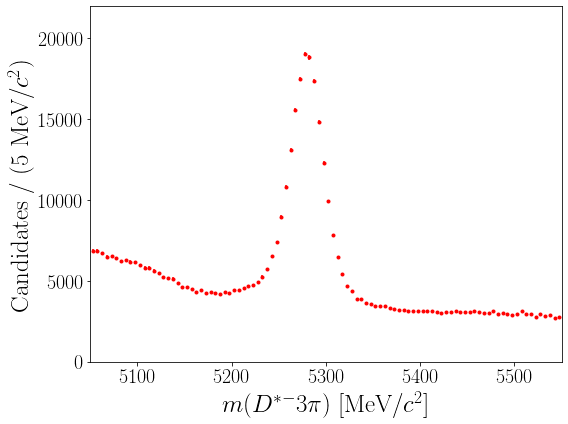

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_data_strip_cutDeltaM.pdf


In [13]:
fct.plot_hist_particle({'data_strip_cutDeltaM':df_data_strip},'B0_M',
              low = low, high = high,
              n_bins = 100, mode_hist = False)

## Simultaneous fit on $m(D_s\to3\pi)$ and $m(B^0)$

### Values for the fit $m(D_s\to3\pi)$

In [8]:
n_events_tau_M = len(df_data_strip.query(f'tau_M > {low_tau_M} and tau_M < {high_tau_M}'))

In [9]:
# name             value    minuit_hesse         minuit_minos    at limit
# ----------  ----------  --------------  -------------------  ----------
# n_sig_tau        11550     +/- 2.4e+02  -2.4e+02   +2.4e+02       False
# n_bkg_tau        94620     +/- 3.8e+02  -3.8e+02   +3.8e+02       False
# mu_tau            1969     +/-     0.2  -    0.2   +    0.2       False
# sigma_tau        9.448     +/-    0.21  -   0.21   +   0.21       False
# lambda_tau   -0.002017     +/- 7.1e-05  -7.1e-05   +7.1e-05       False

initial_values_tau = { # it seems that this one works with almost every BDT cut....
    'mu_tau': {
        'value' : 1969.,
        'low': 1965.,
        'high': 1975.,     
    },
    'sigma_tau': {
        'value' : 9.448,
        'low': 5.,
        'high': 15.,
    },
    'n_bkg_tau': {
        'value' : 94620,
        'low': 0,
        'high': n_events_tau_M,  
    },
    'n_sig_tau': {
        'value' : 11550,
        'low': 0,
        'high': n_events_tau_M,  
    },
    'lambda_tau': {
        'value' : -0.002,
        'low': -0.01,
        'high': -0.0001  
    }
}

### Values for the fit $m(B^0)$

In [10]:
n_events_B0_M = len(df_data_strip.query(f'B0_M > {low} and B0_M < {high}'))


# n_sig_k = 144000
# n_bkg_k = 336000
# n_bkg2_k = 47000

# # n_sig           144000     +/- 1.1e+03  -1.1e+03   +1.1e+03       False
# # n_bkg           336100     +/- 2.8e+03  -2.8e+03   +3.1e+03       False
# # n_bkg2           47010     +/- 1.8e+03  -1.8e+03   +1.8e+03       False
# # alphaL           1.171     +/-    0.02  -   0.02   +   0.02       False
# # nL               1.417     +/-   0.029  -  0.029   +  0.029       False
# # mu                5279     +/-   0.082  -  0.082   +  0.082       False
# # sigma            17.61     +/-     0.1  -    0.1   +    0.1       False
# # lambda      -0.0006497     +/- 4.8e-05  -5.1e-05   +4.8e-05       False
# # mu2               5053     +/-     2.8  -    2.8   +    2.8       False
# # sigma2           64.14     +/-     2.1  -      2   +      2       False

# initial_values = {
#     'mu'       :{ 'value': 5279.                        , 'low': 5279.-1.                     , 'high': 5279.+1.                    , 'floating': True},
#     'sigma'    :{ 'value': 17.5                         , 'low': 17.-2.                       , 'high': 17.+2.                      , 'floating': True},
#     'alphaL'   :{ 'value': 1.17                         , 'low': 0.1                          , 'high': 3.                          , 'floating': True},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 0.1                          , 'high': 8.                          , 'floating': True},
#     'nL'       :{ 'value': 1.4                          , 'low': 0.1                          , 'high': 3.                          , 'floating': True},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 0.1                          , 'high': 8.                          , 'floating': True},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': n_sig_k*0.2                  , 'high': n_events_B0_M*2/3           , 'floating': True},
#     'lambda'   :{ 'value': -0.0006                      , 'low': -0.001                       , 'high': -0.00008                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': n_bkg_k*0.2                  , 'high': n_events_B0_M               , 'floating': True},
#     'mu2'      :{ 'value': 5053.                        , 'low': 5040.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': 64.                          , 'low': 58.                          , 'high': 70.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': n_bkg2_k*0.2                 , 'high': n_events_B0_M/4             , 'floating': True},
# }


n_sig_k = 144000
n_bkg_k = 336000
n_bkg2_k = 47000

# n_sig           144000     +/- 1.1e+03  -1.1e+03   +1.1e+03       False
# n_bkg           336100     +/- 2.8e+03  -2.8e+03   +3.1e+03       False
# n_bkg2           47010     +/- 1.8e+03  -1.8e+03   +1.8e+03       False
# alphaL           1.171     +/-    0.02  -   0.02   +   0.02       False
# nL               1.417     +/-   0.029  -  0.029   +  0.029       False
# mu                5279     +/-   0.082  -  0.082   +  0.082       False
# sigma            17.61     +/-     0.1  -    0.1   +    0.1       False
# lambda      -0.0006497     +/- 4.8e-05  -5.1e-05   +4.8e-05       False
# mu2               5053     +/-     2.8  -    2.8   +    2.8       False
# sigma2           64.14     +/-     2.1  -      2   +      2       False

initial_values = {
    'mu'       :{ 'value': 5279.                        , 'low': 5279.-1.                     , 'high': 5279.+1.                    , 'floating': True},
    'sigma'    :{ 'value': 17.5                         , 'low': 17.-2.                       , 'high': 17.+2.                      , 'floating': True},
    'alphaL'   :{ 'value': 1.17                         , 'low': 0.1                          , 'high': 3.                          , 'floating': True},
    'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 0.1                          , 'high': 8.                          , 'floating': True},
    'nL'       :{ 'value': 1.4                          , 'low': 0.1                          , 'high': 3.                          , 'floating': True},
    'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 0.1                          , 'high': 8.                          , 'floating': True},
    'n_sig'    :{ 'value': n_sig_k                      , 'low': n_sig_k*0.2                  , 'high': n_events_B0_M*2/3           , 'floating': True},
    'lambda'   :{ 'value': -0.0006                      , 'low': -0.001                       , 'high': -0.00008                    , 'floating': True},
    'n_bkg'    :{ 'value': n_bkg_k                      , 'low': n_bkg_k*0.2                  , 'high': n_events_B0_M               , 'floating': True},
    'mu2'      :{ 'value': 5053.                        , 'low': 5040.                        , 'high': 5070.                       , 'floating': True},
    'sigma2'   :{ 'value': 64.                          , 'low': 58.                          , 'high': 70.                         , 'floating': True},
    'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': n_bkg2_k*0.2                 , 'high': n_events_B0_M/4             , 'floating': True},
}


## Simultaneous fit

### Observables and variables

In [11]:
obs_tau = zfit.Space("x", limits=(low_tau_M, high_tau_M))
zparams_tau = {}

for var_tau in initial_values_tau.keys():
    zparams_tau[var_tau] = zfit.Parameter(f"{var_tau}", initial_values_tau[var_tau]['value'], 
                                     initial_values_tau[var_tau]['low'], initial_values_tau[var_tau]['high'])

In [12]:
obs = zfit.Space("x", limits=(low, high))

zparams = {}
for var in initial_values.keys():
    zparams[var] = zfit.Parameter(f"{var}",
                                  initial_values[var]['value'], 
                                  initial_values[var]['low'], 
                                  initial_values[var]['high'],
                                  floating = initial_values[var]['floating'])
    #print(zparams[var])

In [13]:
name_params_tau = {
    f'mu_tau':'$\mu_{m_{D_s}}$',
    f'sigma_tau':'$\sigma_{m_{D_s}}$',
    f'n_bkg_tau':'$n_{bkg}$',
    f'n_sig_tau':'$n_{sig,D_s}$',
    f'lambda_tau':'$\\lambda$',
}

name_params = {
    f'mu'      : '$\mu$',
    f'sigma'   : '$\sigma$',
    f'alphaL'  : '$\\alpha_L$',
    f'alphaR'  : '$\\alpha_R$',
    f'nL'      : '$n_L$',
    f'nR'      : '$n_R$',
    f'n_bkg'   : '$n_{bkg}$',
    f'n_sig'   : '$n_{sig}$',
    f'lambda'  : '$\\lambda$',
    f'mu2'     : '$\\mu_2$',
    f'sigma2'  : '$\\sigma_2$',
    f'n_bkg2'  : '$n_{bkg2}$',
}

### PDFs

In [14]:
gaussian_tau = zfit.pdf.Gauss(zparams_tau["mu_tau"],zparams_tau["sigma_tau"],obs=obs_tau)
exponential_tau = zfit.pdf.Exponential(zparams_tau["lambda_tau"], obs=obs_tau)

gaussian_ext_tau = gaussian_tau.create_extended(zparams_tau["n_sig_tau"])
exp_ext_tau = exponential_tau.create_extended(zparams_tau["n_bkg_tau"])
model_tau = zfit.pdf.SumPDF([gaussian_ext_tau, exp_ext_tau]) # gauss is folded by frac

data_tau = zfit.Data.from_pandas(df_data_strip['tau_M'],obs=obs_tau)

2020-11-25 12:14:38.935855: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 23647592 exceeds 10% of free system memory.


In [15]:
doubleCB = zfit.pdf.DoubleCB(zparams['mu'], zparams['sigma'],
                             zparams['alphaL'], zparams['alphaR'],
                             zparams['nL'], zparams['nR'], 
                             obs=obs)

exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)
gaussian = zfit.pdf.Gauss(zparams['mu2'],zparams['sigma2'],obs=obs)

doubleCB_Ds = zfit.pdf.DoubleCB(zparams['mu'], zparams['sigma'], 
                                zparams['alphaL'], zparams['alphaR'], 
                                zparams['nL'], zparams['nR'], 
                                obs=obs)

# sum of the two PDFs
doubleCB_ext = doubleCB.create_extended(zparams['n_sig'])
exp_ext = exponential.create_extended(zparams['n_bkg'])
gaussian_ext = gaussian.create_extended(zparams['n_bkg2'])
doubleCB_Ds_ext = doubleCB_Ds.create_extended(zparams_tau['n_sig_tau'])

model = zfit.pdf.SumPDF([doubleCB_ext, exp_ext,gaussian_ext,doubleCB_Ds_ext]) # gauss is folded by frac
data = zfit.Data.from_pandas(df_data_strip['B0_M'], obs=obs)

2020-11-25 12:14:39.060004: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 23647592 exceeds 10% of free system memory.


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:392: UserWarning: The function <function Space.limits at 0x7effdce943b0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7effdce9a7a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins
findfont: Font family ['serif'] not found. Falling back to Dej

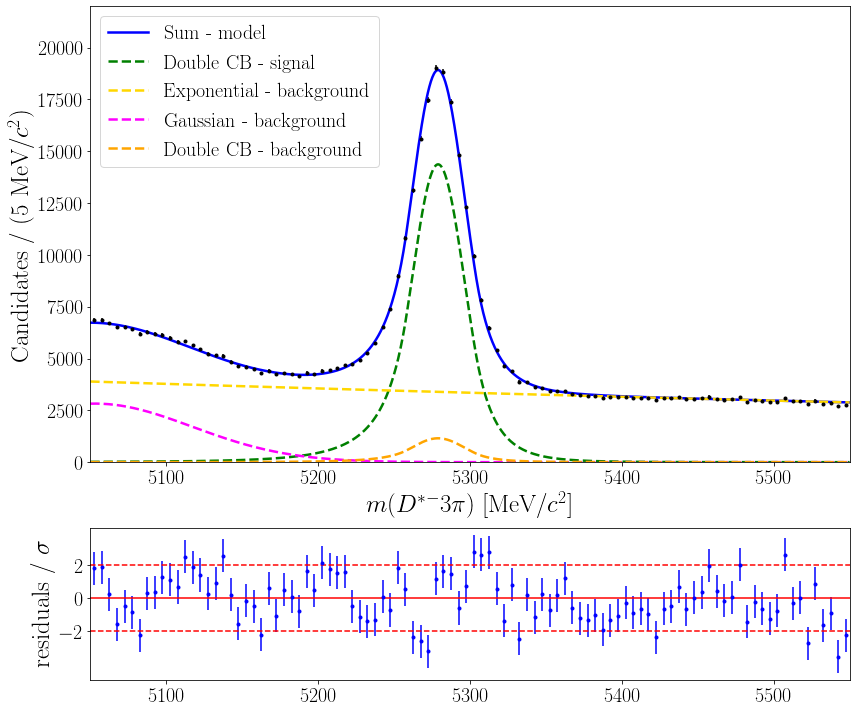

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_test/B0_M_data_strip_cutDeltaM_test_fit.pdf


In [16]:
# n_sig_k = 108000.
# n_bkg_k = 86800.
# n_bkg2_k = 35000.

# zparams['n_sig'].set_value(n_sig_k)
# zparams['n_bkg'].set_value(n_bkg_k)
# zparams['n_bkg2'].set_value(n_bkg2_k)

# zparams['lambda'].set_value(-0.0009)

plot_hist_fit_particle(df_data_strip, 'B0_M', models = [model,doubleCB_ext,exp_ext,gaussian_ext, doubleCB_Ds_ext], 
              obs=obs, n_bins = 100,mode_hist = False,
              name_data = 'data strip cutDeltaM_test')

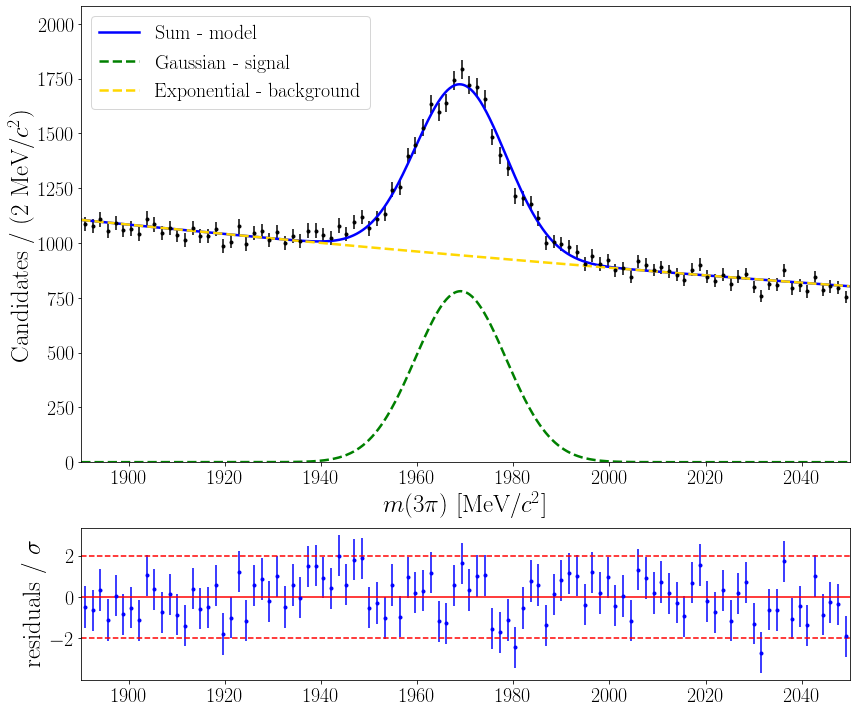

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_test/tau_M_data_strip_cutDeltaM_test_fit.pdf


In [17]:
plot_hist_fit_particle(df_data_strip,'tau_M', models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
              obs=obs_tau, n_bins = 100,mode_hist = False,
              name_data = 'data strip cutDeltaM_test')

### Fitting

In [21]:
result, params = launch_fit([model_tau, model], [data_tau, data], extended=True)

------------------------------------------------------------------
| FCN = -3.899e+06              |     Ncalls=411 (411 total)     |
| EDM = 0.0195 (Goal: 0.001)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


RuntimeError: Function minimum is not valid. Make sure MIGRAD converged first

Info: VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
Info in Edm is smaller than machine accuracy : machineLimit = 0.232425
Info in Current  Edm is : edm = 0.019482
Info in Required Edm is : edmval = 0.001
Info in VariableMetricBuilder: INVALID function minimum - edm is above tolerance, : edm = 0.019482
Info in VariableMetricBuilder: Required tolerance  is 10 x edmval  : edmval = 0.001


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


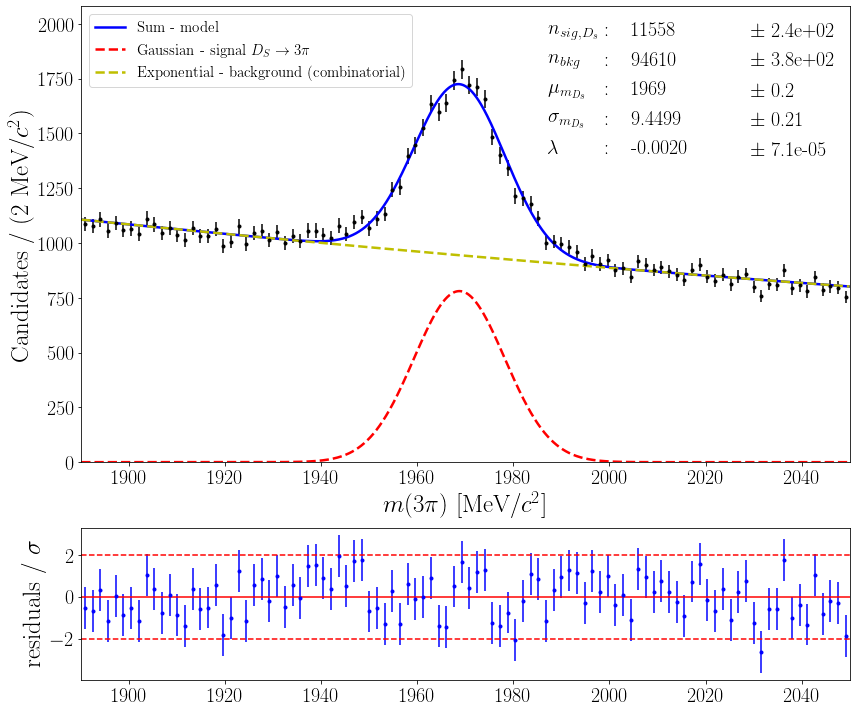

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_data_strip_cutDeltaM/tau_M_all_data_strip_cutDeltaM_fit.pdf


In [20]:
plot_hist_fit_particle(df_data_strip,'tau_M',models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                       name_models = [None, '$D_S \\to 3\pi$','(combinatorial)'], colors = ['b','r','y'],
              obs=obs_tau, n_bins = 100,mode_hist = False, name_data=name_data, fontsize_leg=15,
              params=params, name_params=name_params_tau)

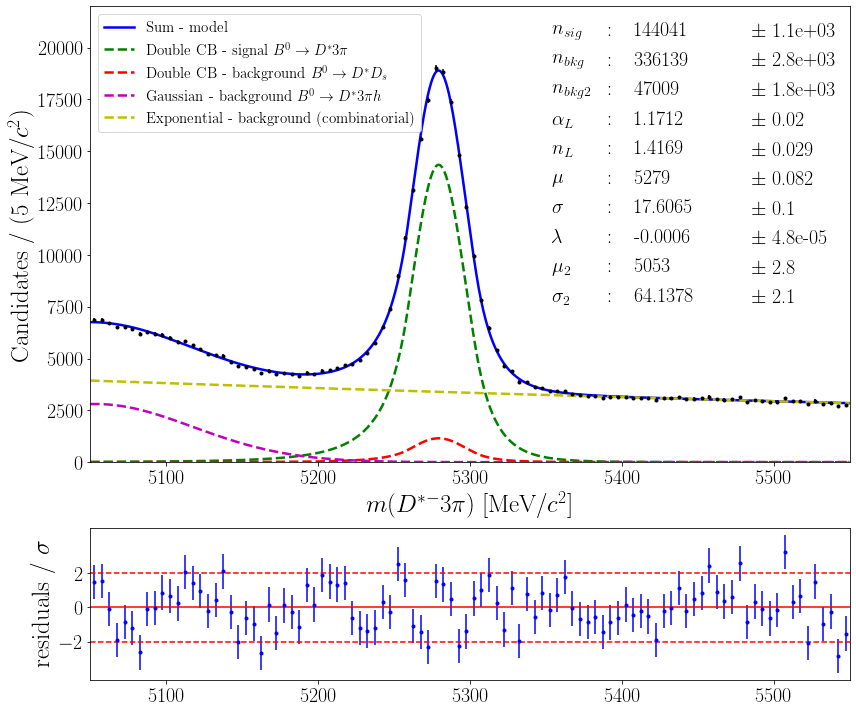

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_data_strip_cutDeltaM/B0_M_all_data_strip_cutDeltaM_fit.pdf


In [21]:
plot_hist_fit_particle(df_data_strip,'B0_M', models = [model,doubleCB_ext, doubleCB_Ds_ext, gaussian_ext, exp_ext],
                       name_models = [None, '$B^0\\to D^* 3\pi$','$B^0\\to D^*D_s$','$B^0\\to D^*3\pi h$', '(combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data, colors=['b','g','r','m','y'], fontsize_leg=15,
                       params=params,name_params=name_params)

In [ ]:
#save_params(params,f'all_data_strip',True)